In [35]:
%load_ext autoreload
%autoreload 2
import numpy as np
import lsp 
from matplotlib import pyplot as plt
import os.path as osp
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prefix Lattice Example

This is painfully slow. Feel free to implement fast Moebius transform and inverse :) 

In [2]:
def prefix(a, b):
    return osp.commonprefix([a, b])

def meet(a, b):
    return prefix(a, b)

Read data...

In [3]:
with open('./data/books/kritik_der_reinen_vernunft.txt', 'r') as f:
    corpus = f.readlines()

start, end = None, None
for idx, l in enumerate(corpus):
    if '*** START OF' in l:
        start = idx
    if '*** END OF' in l:
        end = idx
        
corpus_ = corpus[start+1:end]
corpus = ''
for l in corpus_:
    corpus += l
corpus = re.findall(r'\w+', corpus.lower()) 
counts = {}
for w in corpus:
    try:
        counts[w] += 1
    except KeyError:
        counts[w] = 1
count_vec = np.asarray([c for k, c in counts.items()])

Close under meet and compute Fourier transform matrix representations.

In [13]:
generator = list(counts.keys())
sp = lsp.LSP(generator, meet)

closing under meet...
computing partial order...
inverting partial order matrix...


In [30]:
print(len(list(counts.keys())), "elements before meet closure", len(sp.lattice), "after meet closure.")

9952 elements before meet closure 12636 after meet closure.


Create signal vector.

In [16]:
signal = {key: 0 for key in sp.lattice}
for key in sp.lattice:
    for word, count in counts.items():
        if meet(key, word) == key:
            signal[key] += count

Normalize and compute Fourier transform.

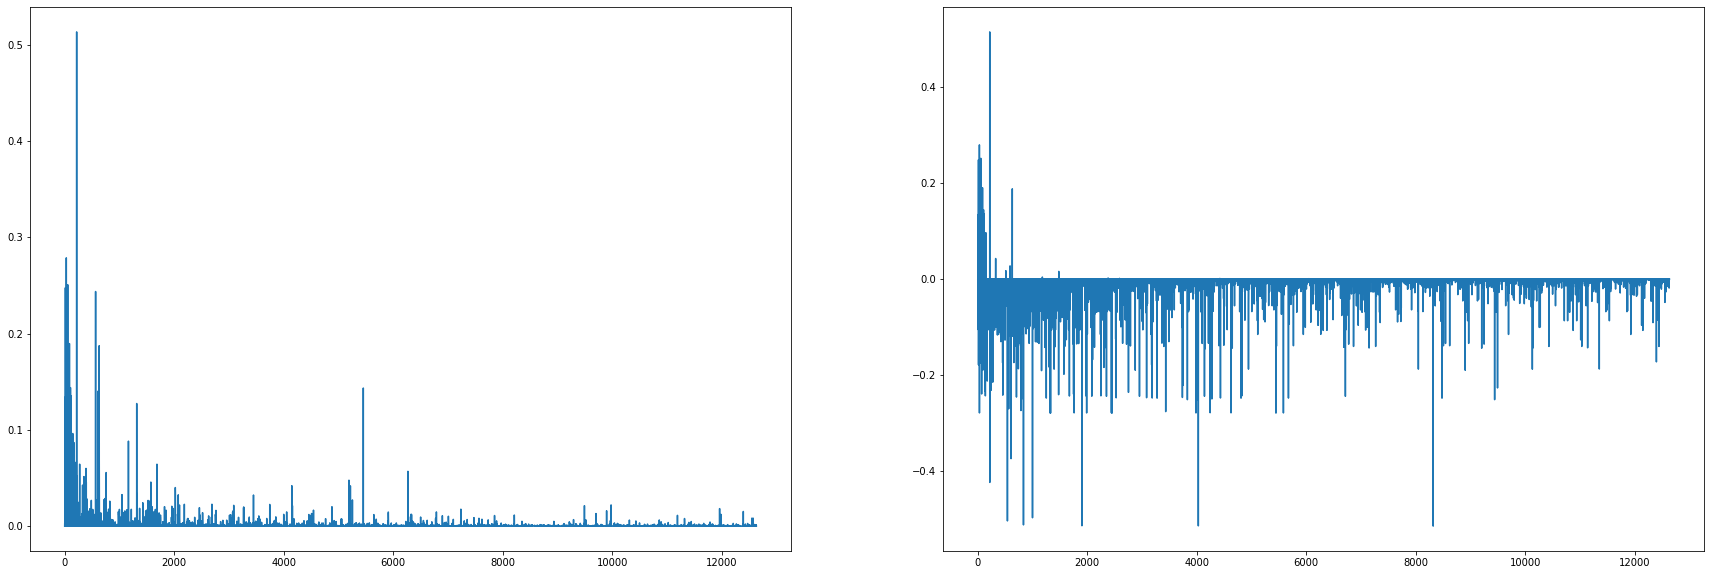

In [31]:
s = np.asarray([signal[l] for l in sp.lattice], dtype=np.float64)
s[0] = 0
s /= np.linalg.norm(s)
s_hat = sp.ft(s)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1).plot(s)
plt.subplot(1, 2, 2).plot(s_hat)

How many small spectral coefficients?

90.14719848053181 % are leq than 0.01.


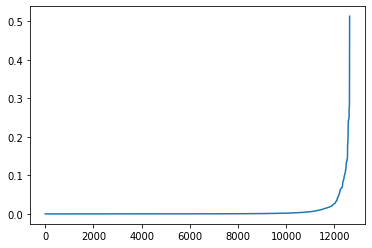

In [34]:
print(100*np.sum(np.abs(s_hat) < 0.01)/len(s_hat), "% are leq than 0.01.")
plt.plot(np.sort(np.abs(s_hat)))

Reconstruction error plot.

solving ...


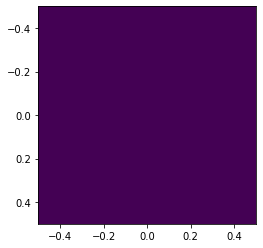

solving ...


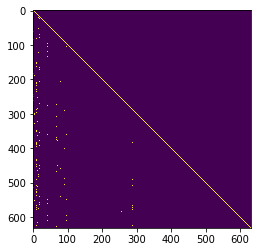

solving ...


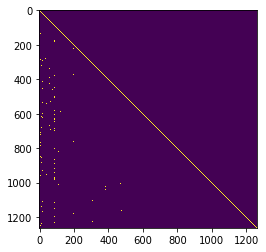

solving ...


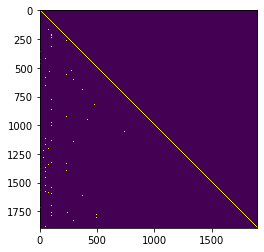

solving ...


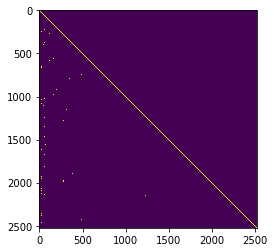

solving ...


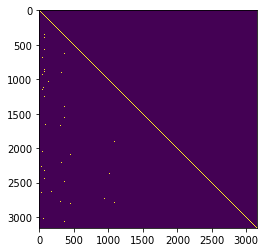

solving ...


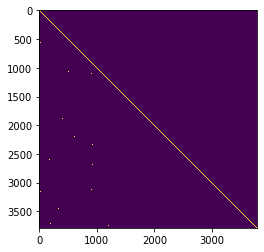

solving ...


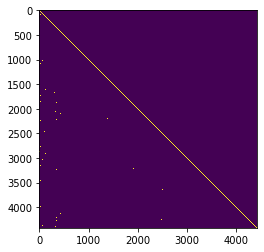

solving ...


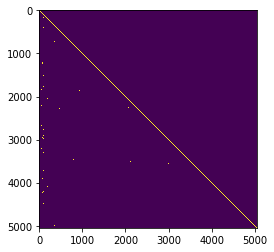

solving ...


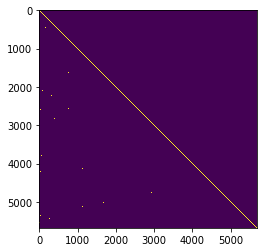

solving ...


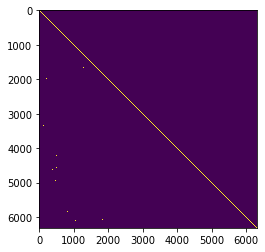

solving ...


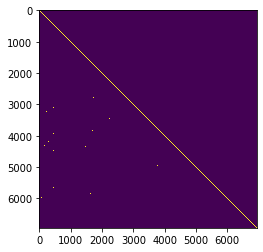

solving ...


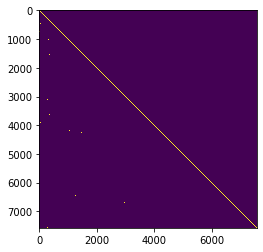

solving ...


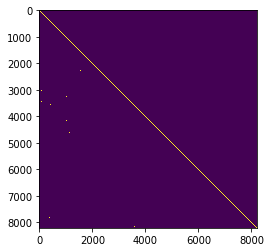

solving ...


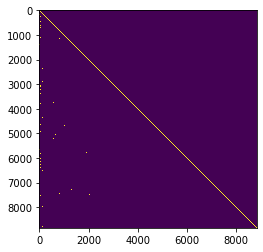

solving ...


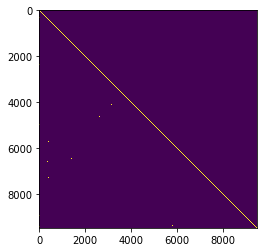

solving ...


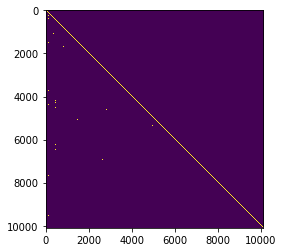

solving ...


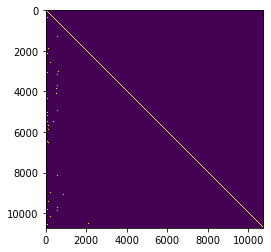

solving ...


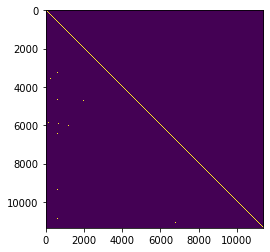

solving ...


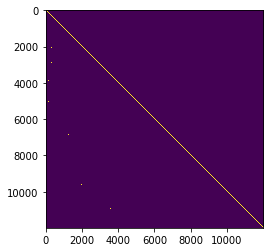

In [23]:
errs, steps = sp.reconstruction_plot(s, s_hat)

Text(0.5, 0, 'amount of frequencies')

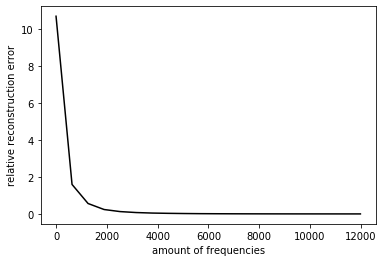

In [24]:
fig = plt.figure()
plt.plot(steps, errs, c='black')
plt.ylabel('relative reconstruction error')
plt.xlabel('amount of frequencies')

In [25]:
for err, step in zip(errs, steps):
    print(step, err)

1 10.682637386609416
631 1.5928312159083937
1262 0.5631236144329236
1893 0.23816039061195632
2524 0.1263907606340973
3155 0.07459858456082401
3786 0.046519678679877316
4417 0.031717149045593106
5048 0.021438815146788744
5679 0.014020817111347339
6310 0.009925873189256215
6941 0.007117061685161044
7572 0.00518820268981094
8203 0.003718063666792958
8834 0.0026459439270611175
9465 0.0018787888069222258
10096 0.0014359500876880437
10727 0.0008614706691268275
11358 0.0006040663173813249
11989 0.00040427117421185023


Some prefixes.

In [28]:
for prefix in sp.lattice:
    print(prefix)


c
co
con
cons
conse
consenti
consentientia
b
be
bek
beka
bekam
e
er
erö
eröffn
eröffne
eröffnet
bei
beiz
beizu
beizutragen
bet
bettle
m
me
mec
mechani
mechanik
a
as
asymptotisch
mü
müh
mühsam
mühsame
mühsamen
r
re
rech
recht
rechts
rechtsh
rechtshandel
p
pr
pro
prolephis
u
un
uns
unsch
unschicklich
unschickliche
unschickliches
s
si
sit
sitz
sitze
po
pol
poli
polizei
ei
ein
einb
einbild
einbildung
einbildungen
su
sunt
v
ve
ver
vers
versp
verspare
ph
pha
phaenomen
phaenomena
f
fr
frü
früchte
w
we
wes
wesen
wesentlich
wesentlichste
wesentlichsten
h
hi
hin
hinein
hineinziehen
wu
wur
wurde
wurden
l
la
lahme
g
gr
gri
grille
vern
vernunft
vernunftf
vernunftfor
vernunftforschungen
n
na
nah
nahrung
weg
wegs
wegsch
wegschaff
wegschafft
fl
flie
fließ
fließe
fließen
fließens
sc
sch
sche
schei
schein
scheingründe
k
ka
kassenbestande
ab
abz
abzu
abzuwe
abzuwei
abzuweichen
une
uner
unergründlichen
z
ze
zen
zentralgesetze
pa
par
part
parte
partei
parteien
schä
schätz
schätzbaren
ko
kon
kont
konte
kon

herleiten
nature
naturein
natureinrichtung
mutig
mutige
ide
ideal
ideali
idealität
gewö
gewöhn
gewöhnlich
gewöhnliche
gewöhnlicher
gewöhnlichermaßen
eviden
evident
evidente
evidenten
erkämpfen
hyperphysisch
hyperphysische
hyperphysischen
noumeno
noumenon
wozu
geste
gesteh
gesteht
dazu
dazukunft
weiche
weichen
fortgesetzt
fortgesetzte
fortgesetzter
gute
guten
gutenberg
gutenberg2000
unermeßlich
unermeßlichkeit
verstanden
urquelle
behau
behaupt
behaupte
behaupten
behauptend
behauptende
bloßes
schli
schließ
schließe
schließen
schließenkönnen
verstandeswesen
tat
tatsache
tatsachen
eigentümliches
gebildet
schr
schrei
schreib
schreibt
überde
überdem
prosyllogism
prosyllogismen
dri
dring
dringen
dringend
dringenden
begl
beglaubig
beglaubigung
beglaubigungsschein
dunk
dunkle
dunkler
epis
episode
episoden
ausdr
ausdrück
ausdrücke
ausdrücken
mortale
unbestimmtes
abweichungen
bezieht
nichtig
nichtigkeit
wieder
wiedergab
welche
welchen
zeitvorstellung
werde
werdet
tale
talent
talents
effe
effectiv

kre
kreis
kreise
kreisel
bega
begangen
ausrüstung
fakt
fakta
physikotheologen
zähigkeit
scheint
anim
anima
animali
animalität
genos
reflektierte
sieh
sieht
beweglich
bewegliche
beweglichem
elternseelen
auszufinden
spekuliert
brü
brücke
vereiteln
denselben
verändert
veränderte
bedenk
bedenklich
bedenklichkeit
bedenklichkeiten
scheide
scheiden
inst
institution
gelungen
zivilisiert
materiali
materialien
za
zanken
suppositio
supposition
aufgeklärte
aufgeklärter
aufgeklärteren
züge
zügelt
nötigen
hinauszuführen
teilbar
teilbarkeit
abzuh
abzuhalten
erweck
erweckung
ungereimten
verwechsle
reihe
reihen
reihenweise
polemi
polemis
polemisieren
verband
hiermit
paralogism
paralogismen
allgemeinsten
fürs
fürst
naturer
naturerk
naturerkenntnis
naturerkenntnisse
mittelpunkte
zutreffende
zerrüttet
zue
zuer
zuerkennt
hinzugesetzt
psycholog
psychologi
psychologie
realität
realitäten
abspringen
verstandestätigkeit
beides
richtungslinien
unr
unrecht
unrechtmäßig
unrechtmäßigkeit
exzellenz
eine
eines
eines

zeita
zeitalters
auslaufen
vorkäme
weise
weiseste
weisesten
kleid
naturdinge
angleichen
hilfshypothese
unrichtig
unrichtiges
anrät
hinausr
hinausreichen
hinausreichende
hinausreichendem
geschäften
streits
getraue
zergliederer
sensitiv
sensitivum
konzept
stillschweigend
ebende
ebendenselben
schattenrisse
spiels
postulier
postulieren
brucker
beruhe
beruhen
beruhenden
gn
gnaden
billigeren
vortrefflichsten
gegengründen
versorg
versorgt
erdacht
feinde
feindes
fortgesetzten
fassen
tröstliche
müsse
müssen
zusammenzufassen
pendant
unbestimmtheit
verteidiger
zurückgeführt
aushebt
günstigsten
organisierung
ehemaliger
einstimmig
einstimmigen
herzähl
herzählung
wahrheit
wahrheiten
durchreist
dara
darau
daraus
auswi
auswirft
aufzubieten
aufhört
näheres
dargelegt
paradox
paradoxe
ausschlägt
quanta
nr
atomistik
aufbewahr
aufbewahrer
zweideutiges
sprachverwirrung
wolfische
wolfischen
gefunden
verbietet
annehmt
kritik
kritiker
aufführen
begehrungs
begehrungsvermögen
beiwohnen
ägyptern
idealism
idealism

anheften
üben
auszuschießen
entzog
entzogen
aufsatz
nachzusuchen
herzählen
eingewickelt
logik
logiker
logikern
entfernten
immerhin
bestimmbaren
schatz
erscheine
erscheinen
verhältnissen
grübelt
gedächtnisses
darstellung
darstellungsart
ableugnen
unnachlaßliches
auskunft
schätzung
communis
problematischer
rezeptiviät
entscheidung
entscheidungen
privateitelkeit
selten
seltene
seltener
ersuche
fehlerfreien
welchem
auszunehmen
parabolischen
wünscht
vielweniger
läutere
